# Análise da Página do Facebook - Nubank Brasil

Autor: ***Gustavo De Mari*** 

- [Linkedin](https://br.linkedin.com/in/gustavodemari)
- [Site pessoal](http://www.gustavodemari.com.br)

---

# Sumário
1. [Introdução](#Introdução)
2. [Análise Exploratória](#An%C3%A1lise-Explorat%C3%B3ria)
  1. [Evolução cumulativa de interação](#Evolu%C3%A7%C3%A3o-cumulativa-de-intera%C3%A7%C3%A3o)
  2. [Top 5 de posts com maior quantidade de likes](#Top-5-de-posts-com-maior-quantidade-de-likes)
  3. [Top 5 de posts com maior quantidade de shares](#Top-5-de-posts-com-maior-quantidade-de-shares)
  4. [Top 5 de posts com maior quantidade de comments](#Top-5-de-posts-com-maior-quantidade-de-comments)
  5. [Post com mais curtidas](#Post-com-mais-curtidas)
  6. [Post de maior compartilhamento](#Post-de-maior-compartilhamento)
  7. [Post de maior quantidade de comentários](#Post-de-maior-quantidade-de-coment%C3%A1rios)
  8. [Interação média por tipo de status](#Intera%C3%A7%C3%A3o-m%C3%A9dia-por-tipo-de-status)
  9. [Interação média por horário de postagem](#Intera%C3%A7%C3%A3o-m%C3%A9dia-por-hor%C3%A1rio-da-postagem)
  10. [Interação média por quantidade de caracteres da postagem](#Intera%C3%A7%C3%A3o-m%C3%A9dia-por-quantidade-de-caracteres-da-postagem)
  11. [Interação média por dia da semana](#Intera%C3%A7%C3%A3o-m%C3%A9dia-por-dia-da-semana)
  12. [Interação média por quadrimestre](#Intera%C3%A7%C3%A3o-m%C3%A9dia-por-quadrimestre)
  13. [Interação média por mês](#Intera%C3%A7%C3%A3o-m%C3%A9dia-por-m%C3%AAs)
  14. [Interação média por semana](#Intera%C3%A7%C3%A3o-m%C3%A9dia-por-semana)
  15. [Frequência de postagens por tipo de postagem](#Frequ%C3%AAncia-de-postagens-por-tipo-de-postagem)
  16. [Frequência de postagens por dia da semana](#Frequ%C3%AAncia-de-postagens-por-dia-da-semana)
  17. [Frequência de postagem por quadrimestre](#Frequ%C3%AAncia-de-postagem-por-quadrimestre)
  18. [Frequência de postagem por mês](#Frequ%C3%AAncia-de-postagem-por-m%C3%AAs)
  19. [Frequência de postagem por mês e interação mensal](#Frequ%C3%AAncia-de-postagem-por-m%C3%AAs-e-intera%C3%A7%C3%A3o-mensal)
  20. [Frequência de postagem por semana](#Frequ%C3%AAncia-de-postagem-por-semana)
  21. [Frequência de postagem por semana e interação semanal](#Frequ%C3%AAncia-de-postagem-por-semana-e-intera%C3%A7%C3%A3o-semanal)
3. [Conclusões](#Conclus%C3%B5es)

---

## Introdução

As redes sociais fazem parte do cotidiano dos brasileiros, e os dados que corroboram isso foram levantados pela comScore, onde eles constataram que o brasileiro gasta em média 650 horas por mês nas redes sociais, 

Portanto, as empresas necessitam estar nas redes sociais para se relacionarem com o seu público e esse é o caso da Nubank, uma startup inovadora do setor de fintech que tem crescido bastante.

E para entender um pouco melhor sobre as redes sociais do Nubank, coletamos dados da página deles no Facebook e iremos explorá-los para verificar se obtemos algum dado ou insight interessante.

---

## Análise Exploratória

Pois então, vamos lá.
Antes de começarmos a explorar os dados com mais profundidade, vamos carregá-los e apresentar a estrutura dos dados coletados.

In [2]:
# Loading libraries and defining ploting style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Loading data and defining status published date as a index
data = pd.read_csv("nubankbrasil_facebook_statuses.csv", parse_dates=['status_published'])
data = data.sort_values(by='status_published')
data = data.set_index('status_published')

In [38]:
# Feature engineering
data['status_message_len'] = data['status_message'].str.len().fillna(0).astype(int)
data['status_message_group'] = pd.cut(data['status_message_len'], 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2013-05-06 02:00:00 to 2016-03-10 12:46:43
Data columns (total 10 columns):
status_id               179 non-null object
status_message          174 non-null object
link_name               177 non-null object
status_type             179 non-null object
status_link             179 non-null object
num_likes               179 non-null int64
num_comments            179 non-null int64
num_shares              179 non-null int64
status_message_len      179 non-null int64
status_message_group    179 non-null category
dtypes: category(1), int64(4), object(5)
memory usage: 14.2+ KB


Com as informações listadas acima, podemos ver que temos uma base de dados composta de 179 linhas e 10 colunas, totalizando um uso de memória de aproximadamente 12.6 KB.

E para termos uma melhor intuição do conteúdo dessas linhas e colunas, vamos verificar as primeiras 5 linhas.

In [6]:
data.head(5)

,status_id,status_message,link_name,status_type,status_link,num_likes,num_comments,num_shares,status_message_len,status_message_group
status_published,,,,,,,,,,
2013-05-06 02:00:00,674963205875675_777859865586008,NaN,"Founded on May 6, 2013",link,https://www.facebook.com/674963205875675/posts...,38,2,0,0,"(-0.983, 196.6]"
2014-09-18 11:59:06,674963205875675_776061129099215,NaN,Nubank Brasil,photo,https://www.facebook.com/nubankbrasil/photos/a...,52,7,1,0,"(-0.983, 196.6]"
2014-09-22 13:34:39,674963205875675_777870115584983,NaN,Nubank Brasil's cover photo,photo,https://www.facebook.com/nubankbrasil/photos/a...,33,3,3,0,"(-0.983, 196.6]"
2014-09-24 17:00:01,674963205875675_778850825486912,A tecnologia facilita sua vida. Assuma o contr...,Timeline Photos,photo,https://www.facebook.com/nubankbrasil/photos/a...,48,1,22,126,"(-0.983, 196.6]"
2014-09-26 16:23:38,674963205875675_779636345408360,O Nubank está no Estadão de hoje:,A história por trás do primeiro investimento d...,link,http://blogs.estadao.com.br/start/a-historia-p...,35,1,4,35,"(-0.983, 196.6]"


Após a visualização da tabela acima, podemos ter uma intuição melhor que cada linha se refere à uma postagem realizada na página do Nubank Brasil no Facebook, bem como as diversas informações sobre essa postagem, como o horário de publicação, tipo da postagem, quantidade de likes, quantidade de compartilhamentos e quantidade de comentários.
Como nossa curiosidade inicial tem a ver com o crescimento e partindo de uma visão mais macro para entender a página, uma boa maneira de fazermos isso é de verificar a evolução cumulativa de interações realizadas na página.

---

### Evolução cumulativa de interação

De forma simples, podemos definir a evolução cumulativa de interações (likes, comments e shares) como a soma acumulativa das interações.

In [7]:
cumulative_evo = data[['num_likes', 'num_comments', 'num_shares']].cumsum()

In [8]:
cumulative_evo.head(2)

,num_likes,num_comments,num_shares
status_published,,,
2013-05-06 02:00:00,38,2,0
2014-09-18 11:59:06,90,9,1


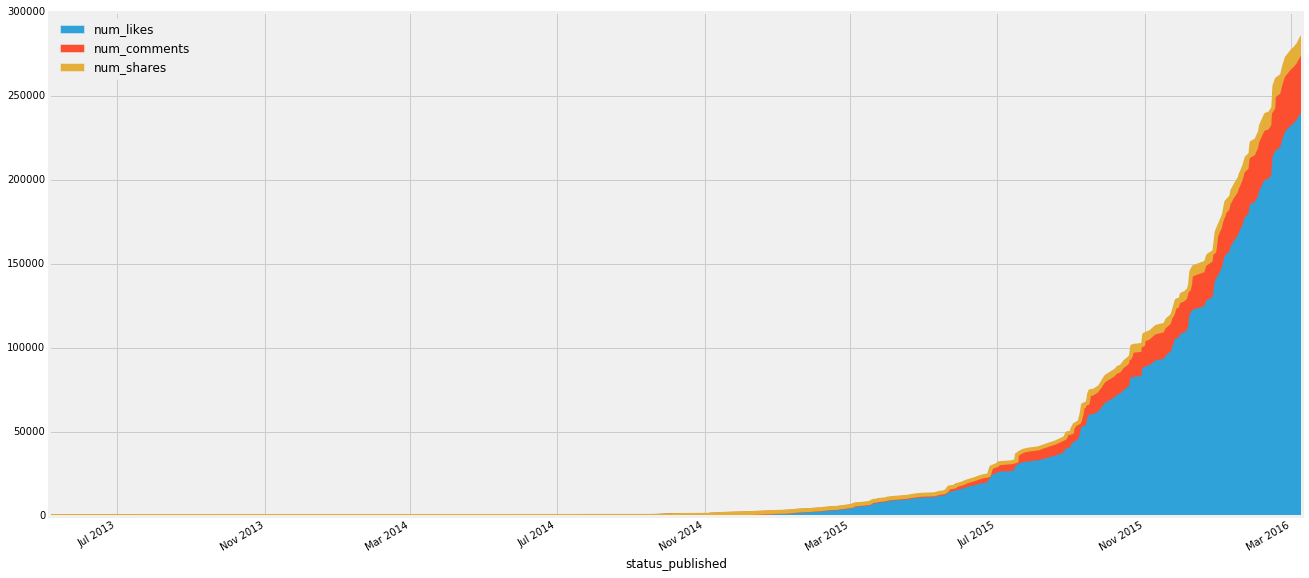

In [9]:
cumulative_evo.plot(kind="area", stacked=True, figsize=(20,10))

Esse gráfico é bem interessante porquê conseguimos extrair diversas informações dele, como:
- A série de dados se inicia em um período um pouco anterior à Julho de 2013 e termina no começo de Março de 2016.
- Dentre os 3 tipos de interações (likes, comments e shares), a quantidade de likes à que possui maior quantidade de interações.
- O desenho da curva das interações possui uma trajetória exponencial.
- É possível verificar que as interações começam se intesificar na virada do ano de 2014 para 2015.
- A quantidade total de likes até Novembro de 2014 era por volta de 1.000 e em Novembro de 2015 era por volta de 80.000, ou seja, em 1 ano, um crescimento de aproximadamente 8.000% ou 80x.
- Um crescimento de 181.25% na quantidade total de likes de Novembro/2015 (80.000) à Março/2016 (225.000).

E para visualizar cada série de forma mais detalhada, vamos utilizar o mesmo gráfico, porém, separando cada série em um gráfico diferente e filtrando a série histórica para mostrar os dados a partir de Julho de 2014.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fc6151950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f3fc6055350>], dtype=object)

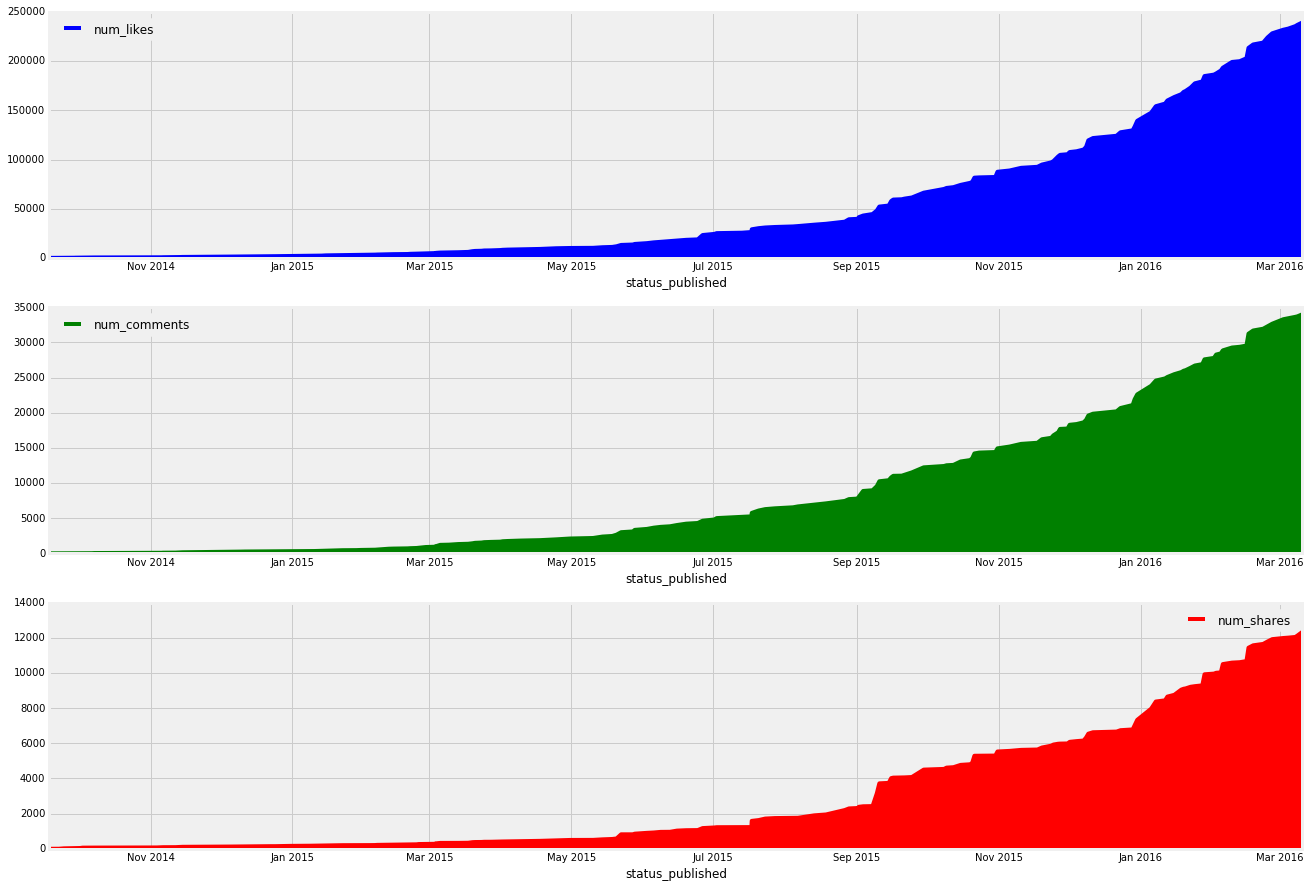

In [10]:
cumulative_evo.ix['2014-07-01':].plot(kind="area", subplots=True, figsize=(20,15), sharex=False)

Como já demos um bom overview sobre a evolução cumulativa de likes, iremos focar nos comments e shares agora.
Nos gráficos acima, podemos extrair as seguintes informações:
- Um crescimento de 2.150% na quantidade total de comments de Janeiro/2015 (1.000) à Janeiro/2016 (22.500).
- Um crescimento de 1.500% na quantidade total de shares de Janeiro/2015 (500) à Janeiro/2016 (8.000).
- Uma publicação teve uma quantidade de shares fora do normal no meio do mês de Setembro/2015.

Agora que tivemos uma visão macro, acabamos tendo uma curiosidade maior para saber quais são os posts que tiveram mais impacto, para isso faremos um ranking com as 5 principais postagem pelo tipo de interação.

---

### Top 5 de posts com maior quantidade de likes

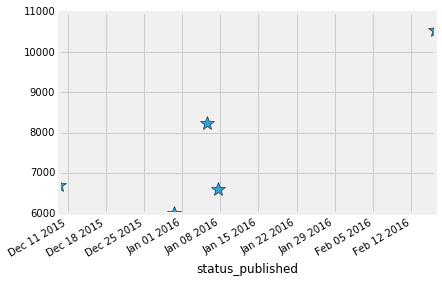

In [11]:
data['num_likes'].nlargest(5).plot(style="*", markersize=15)

Podemos ver que o mês de Janeiro/2016 foi bastante relevante na visão de postagens com maior quantidade de likes, angariando o Top 2, 4 e 5.

Ainda, o post mais curtido de todos os tempos, Top 1, ocorreu no meio de Fevereiro/2016 e possui quase o dobro da quantidade de likes do Top 5.

Para verificar quais são as postagens mais curtidas, veja nos links abaixo.

In [12]:
pd.set_option('display.max_colwidth', -1)

In [13]:
data.nlargest(5, columns=['num_likes'])['status_link']

status_published
2016-02-16 09:37:22    https://www.facebook.com/nubankbrasil/photos/a.778850822153579.1073741831.674963205875675/1025357487502910/?type=3
2016-01-05 12:10:46    https://www.facebook.com/nubankbrasil/photos/a.778850822153579.1073741831.674963205875675/1003600926345233/?type=3
2015-12-09 11:43:07    https://www.facebook.com/nubankbrasil/photos/a.778850822153579.1073741831.674963205875675/989763121062347/?type=3 
2016-01-07 12:43:07    http://goo.gl/1pvfOD                                                                                              
2015-12-30 12:31:20    https://media.giphy.com/media/d2Z4DweRIkdjxqgM/giphy.gif                                                          
Name: status_link, dtype: object

### Top 5 de posts com maior quantidade de shares

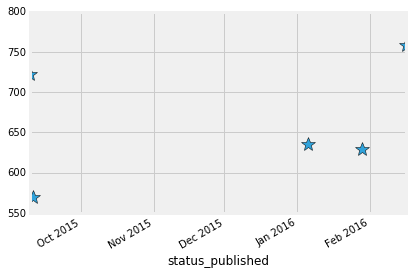

In [14]:
data['num_shares'].nlargest(5).plot(style="*", markersize=15)

Já na visão de shares, verificamos que não há uma diferença tão significante entre o Top 1 e o Top 5.

Outra visão interessante é que temos uma concentração de 2 posts em Setembro/2015 (Top 2 e 5) e 2 posts em Janeiro/2016 (Top 3 e 4).

Além disso, o espaçamento da série é um pouco maior ao compararmos com a visão de likes, pois nessa série o conjunto vai de Setembro/2015 à Março/2016.

Para visualizar as postagens mais compartilhadas, veja os links abaixo.

In [15]:
data.nlargest(5, columns=['num_shares'])['status_link']

status_published
2016-02-16 09:37:22    https://www.facebook.com/nubankbrasil/photos/a.778850822153579.1073741831.674963205875675/1025357487502910/?type=3                            
2015-09-09 11:35:55    http://goo.gl/QDTQ97                                                                                                                          
2016-01-05 12:10:46    https://www.facebook.com/nubankbrasil/photos/a.778850822153579.1073741831.674963205875675/1003600926345233/?type=3                            
2016-01-28 11:30:00    http://g1.globo.com/jornal-da-globo/videos/t/edicoes/v/empresas-que-oferece-servicos-bancario-na-internet-sao-cada-vez-mais-populares/4768420/
2015-09-10 13:38:01    http://goo.gl/Y7fHqL                                                                                                                          
Name: status_link, dtype: object

### Top 5 de posts com maior quantidade de comments

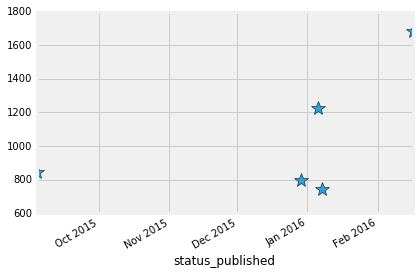

In [16]:
data['num_comments'].nlargest(5).plot(style="*", markersize=15)

Na visão de comments, podemos verificar que o espaçamento da série é bem parecido com a série de shares, indo de Setembro/2015 à Março/2016.

Porém, é possível verificar uma semelhança com a série de likes, pela concentração no mês de Janeiro/2016 (Top 2, 4 e 5).

Outra semelhança com a série de likes, é que o Top 1 tem o dobro de comments do Top 3.

Para visualizar as postagens mais comentadas, veja os links abaixo.

In [17]:
data.nlargest(5, columns=['num_comments'])['status_link']

status_published
2016-02-16 09:37:22    https://www.facebook.com/nubankbrasil/photos/a.778850822153579.1073741831.674963205875675/1025357487502910/?type=3
2016-01-05 12:10:46    https://www.facebook.com/nubankbrasil/photos/a.778850822153579.1073741831.674963205875675/1003600926345233/?type=3
2015-09-03 14:33:14    https://www.facebook.com/nubankbrasil/photos/a.778850822153579.1073741831.674963205875675/947661688605824/?type=3 
2015-12-29 09:13:09    https://www.facebook.com/nubankbrasil/photos/a.778850822153579.1073741831.674963205875675/1000031866702139/?type=3
2016-01-07 12:43:07    http://goo.gl/1pvfOD                                                                                              
Name: status_link, dtype: object

In [18]:
pd.set_option('display.max_colwidth', 50)

### Post com mais curtidas

In [19]:
data.nlargest(1, columns=['num_likes'])

,status_id,status_message,link_name,status_type,status_link,num_likes,num_comments,num_shares,status_message_len,status_message_group
status_published,,,,,,,,,,
2016-02-16 09:37:22,674963205875675_1025357487502910,Se solta e vem correndo! ;) https://goo.gl/aJZG6o,Timeline Photos,photo,https://www.facebook.com/nubankbrasil/photos/a...,10545,1683,759,49,"(-0.983, 196.6]"


### Post de maior compartilhamento

In [20]:
data.nlargest(1, columns=['num_shares'])

,status_id,status_message,link_name,status_type,status_link,num_likes,num_comments,num_shares,status_message_len,status_message_group
status_published,,,,,,,,,,
2016-02-16 09:37:22,674963205875675_1025357487502910,Se solta e vem correndo! ;) https://goo.gl/aJZG6o,Timeline Photos,photo,https://www.facebook.com/nubankbrasil/photos/a...,10545,1683,759,49,"(-0.983, 196.6]"


### Post de maior quantidade de comentários

In [21]:
data.nlargest(1, columns=['num_comments'])

,status_id,status_message,link_name,status_type,status_link,num_likes,num_comments,num_shares,status_message_len,status_message_group
status_published,,,,,,,,,,
2016-02-16 09:37:22,674963205875675_1025357487502910,Se solta e vem correndo! ;) https://goo.gl/aJZG6o,Timeline Photos,photo,https://www.facebook.com/nubankbrasil/photos/a...,10545,1683,759,49,"(-0.983, 196.6]"


Coincidemente, o mesmo post é Top 1 nos 3 tipos de interação, likes, shares e comments.

---

### Interação média por tipo de status

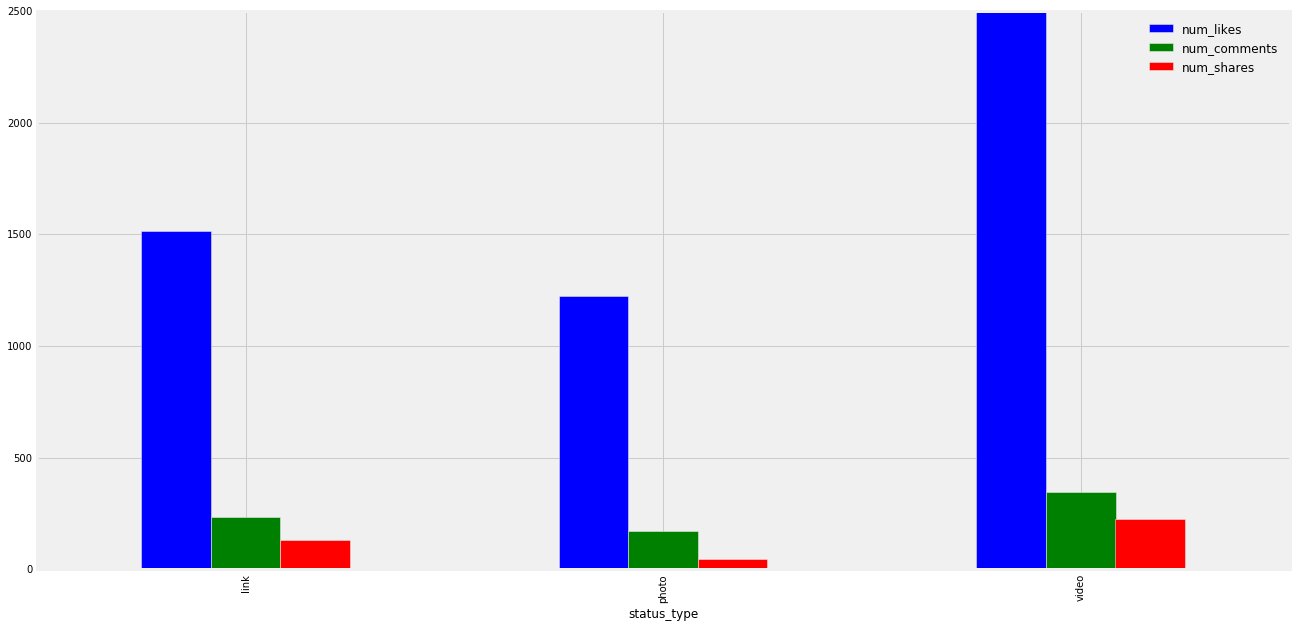

In [22]:
data[['status_type', 'num_likes', 'num_comments', 'num_shares']].groupby('status_type').mean().plot(kind="bar", figsize=(20,10))

É possível notar que os vídeos são, em média, o tipo de interação que possui maior interação, seguido de links e depois fotos.

### Interação média por horário da postagem

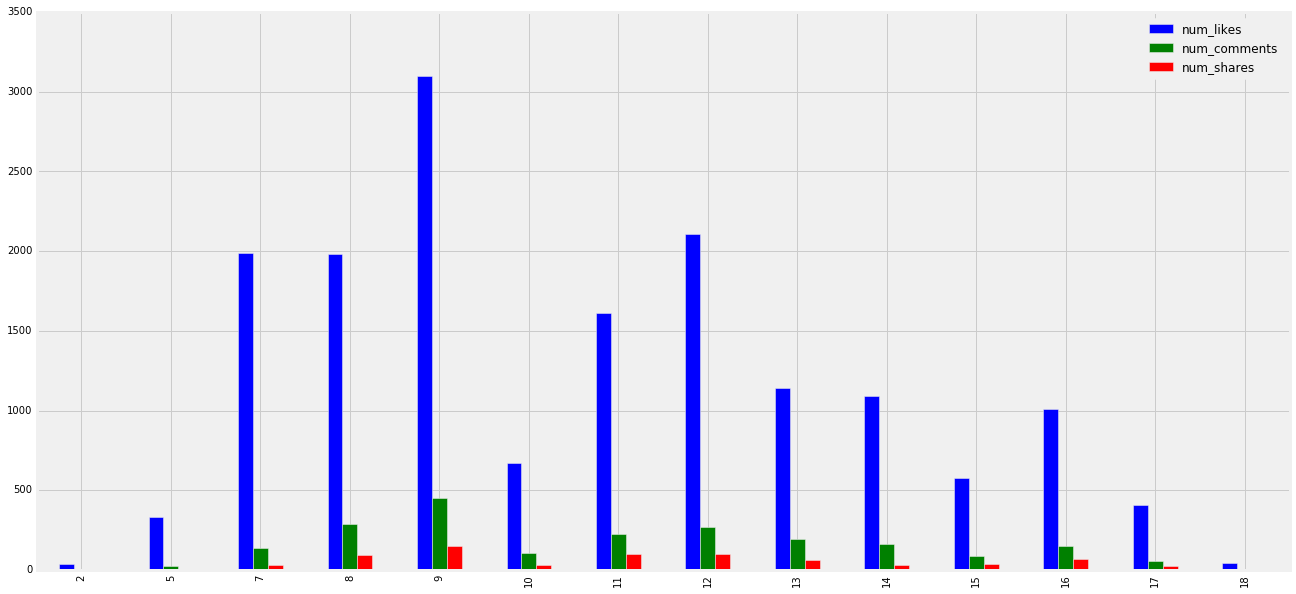

In [23]:
data[['num_likes', 'num_comments', 'num_shares']].groupby([data.index.hour]).mean().plot(kind="bar", figsize=(20,10))

Os horários que tiveram melhor desempenho de interação média da postagem foram:
1. às 9 da manhã
2. ao meio-dia
3. às 8 da manhã
4. às 7 da manhã

### Interação média por quantidade de caracteres da postagem

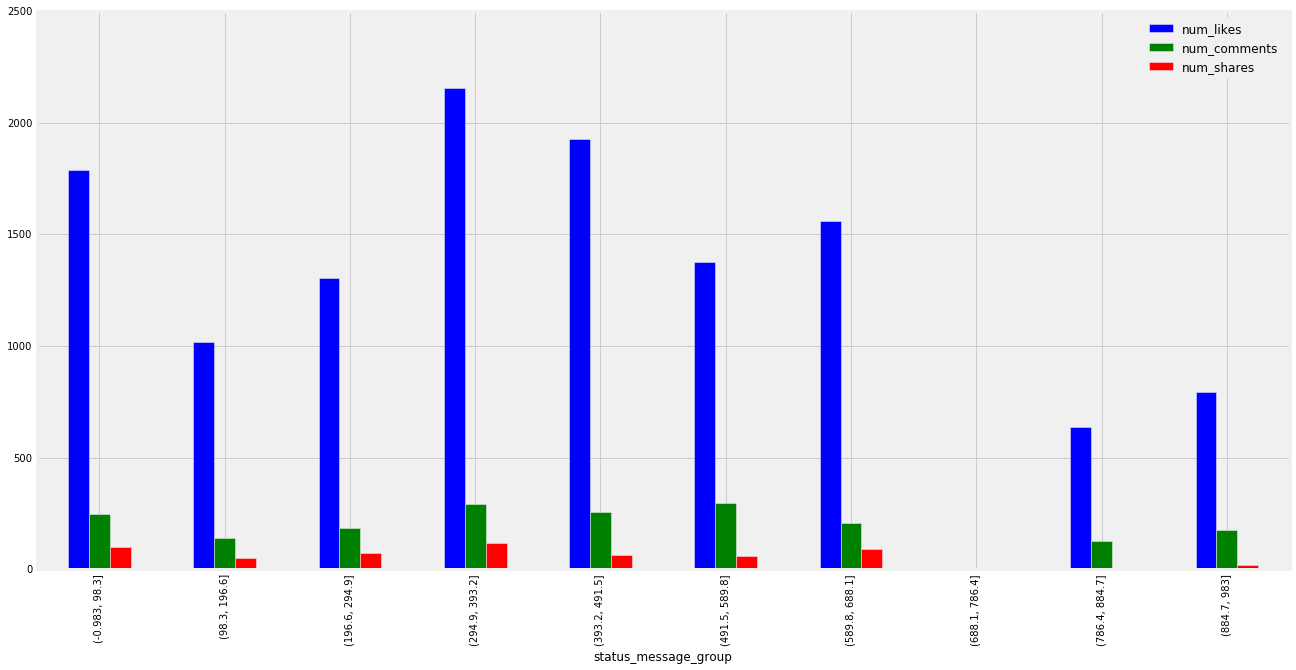

In [39]:
data[['status_message_group','num_likes', 'num_comments', 'num_shares']].groupby('status_message_group').mean().plot(kind="bar", figsize=(20,10))

### Interação média por dia da semana

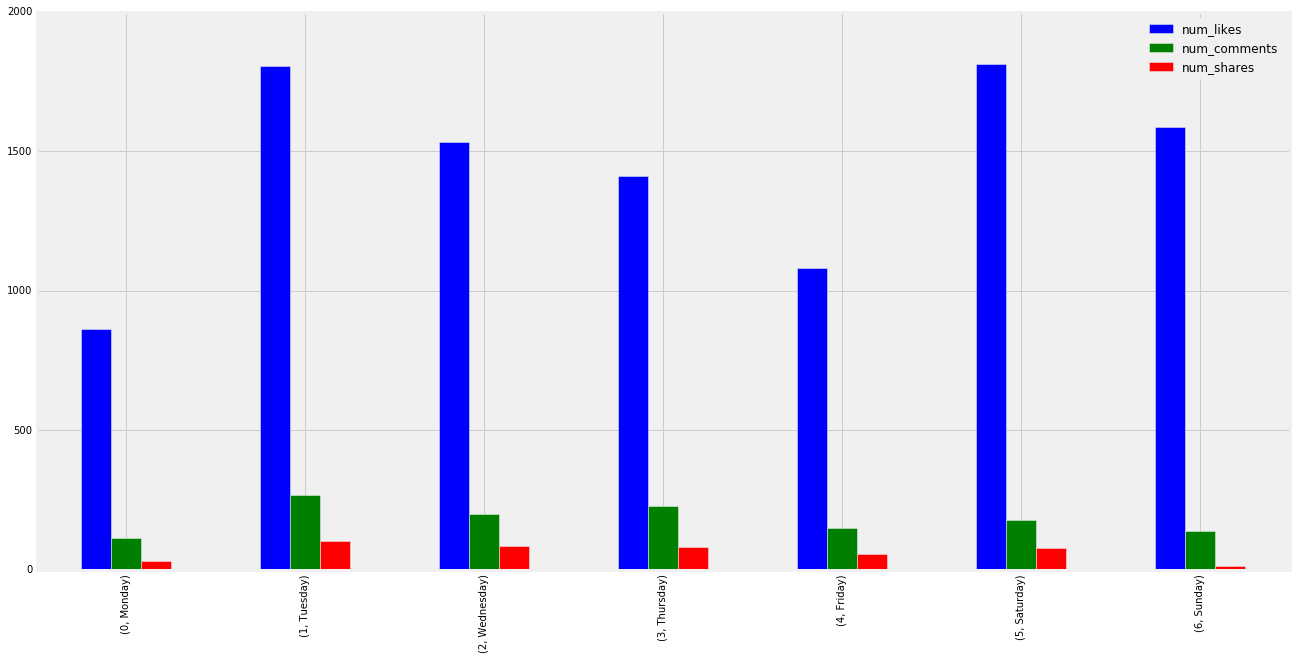

In [34]:
data[['num_likes', 'num_comments', 'num_shares']].groupby([data.index.weekday, data.index.strftime("%A")]).mean().plot(kind="bar", figsize=(20,10))

Se fossemos criar um ranking dos dias de publicações que possuem maior número de likes, em média, temos:
1. Terça-feira
2. Sábado
3. Domingo
4. Quarta-feira
5. Quinta-feira
6. Sexta-feira
7. Segunda-feira

### Interação média por quadrimestre

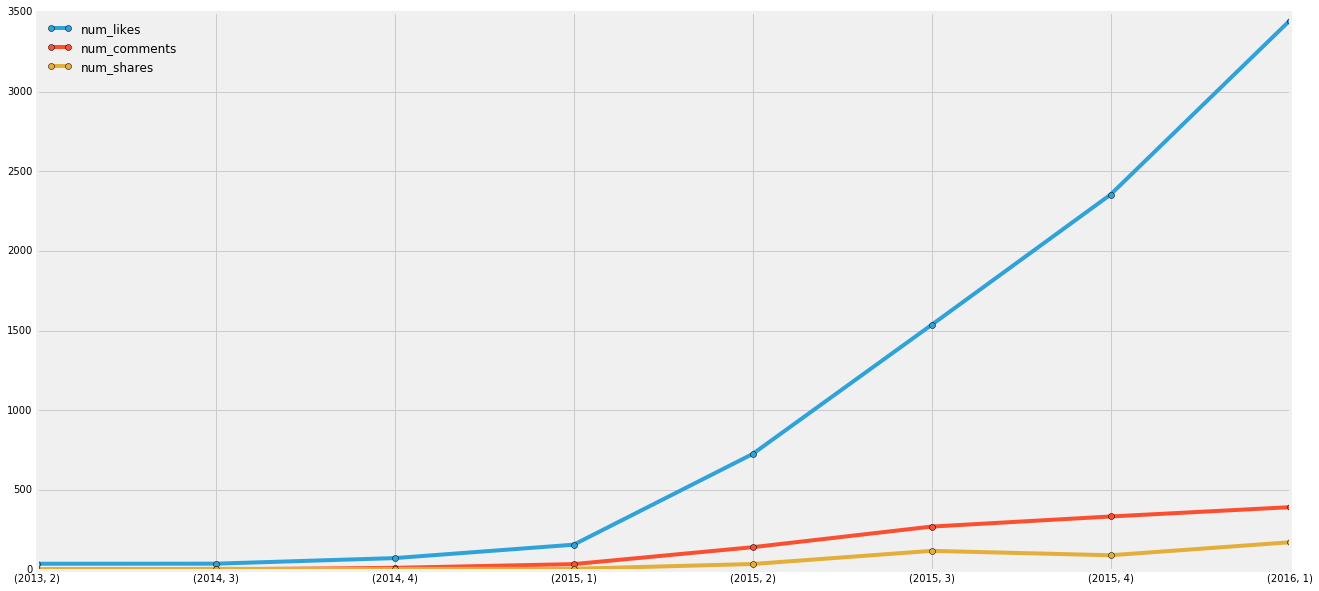

In [35]:
data[['num_likes', 'num_comments', 'num_shares']].groupby([data.index.year, data.index.quarter]).mean().plot(kind="line", figsize=(20,10), style="-o")

Através do gráfico podemos notar que as interações tem crescido durante o tempo.

### Interação média por mês

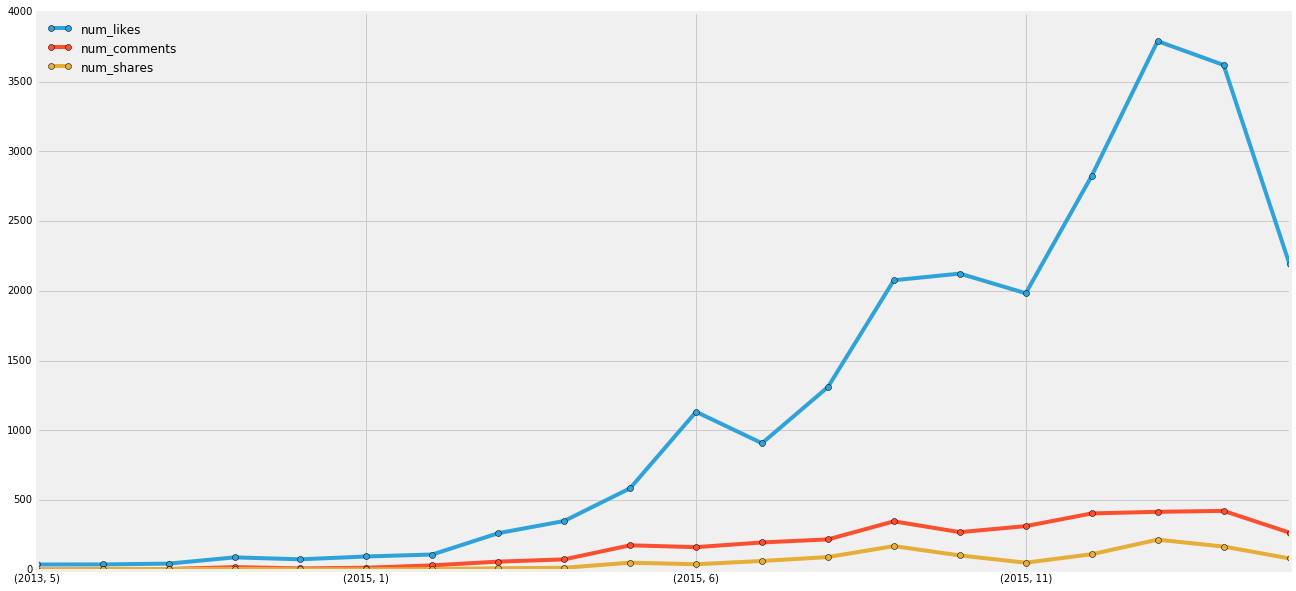

In [36]:
data[['num_likes', 'num_comments', 'num_shares']].groupby([data.index.year, data.index.month]).mean().plot(kind="line", figsize=(20,10), style="-o")

Na visão mensal, podemos notar que em alguns meses há uma leve queda na interação média, porém, a tendência é de crescimento.

### Interação média por semana

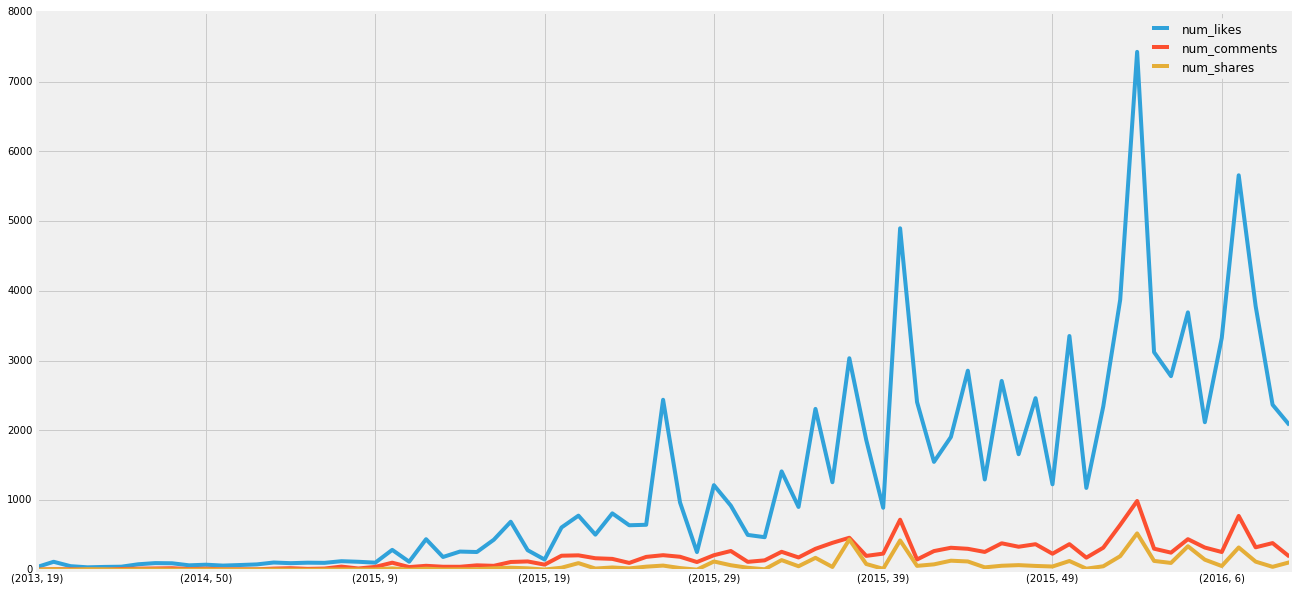

In [37]:
data[['num_likes', 'num_comments', 'num_shares']].groupby([data.index.year, data.index.weekofyear]).mean().plot(kind="line", figsize=(20,10))

Já na visão semanal, podemos ver que há uma variação grande de uma semana para a outra e isso pode ter relação com a frequência de postagens

---

### Frequência de postagens por tipo de postagem

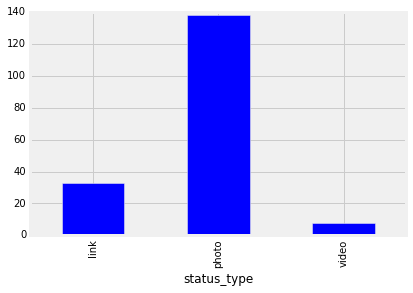

In [29]:
data.groupby(['status_type']).count()['status_id'].plot(kind="bar")

O tipo de postagem predominante é de fotos, seguido de links e depois vídeos.

### Frequência de postagens por dia da semana

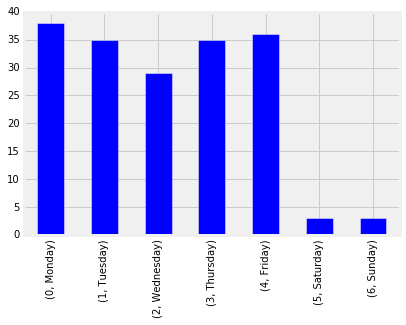

In [30]:
data.groupby([data.index.weekday, data.index.strftime("%A")]).count()['status_id'].plot(kind="bar")

É possível identificar que as postagens realizadas na página do Nubank Brasil ocorrem predominantemente nos dias úteis (seg à sex), apesar de as postagens de finais de semana terem um nível de interação maior.

### Frequência de postagem por quadrimestre

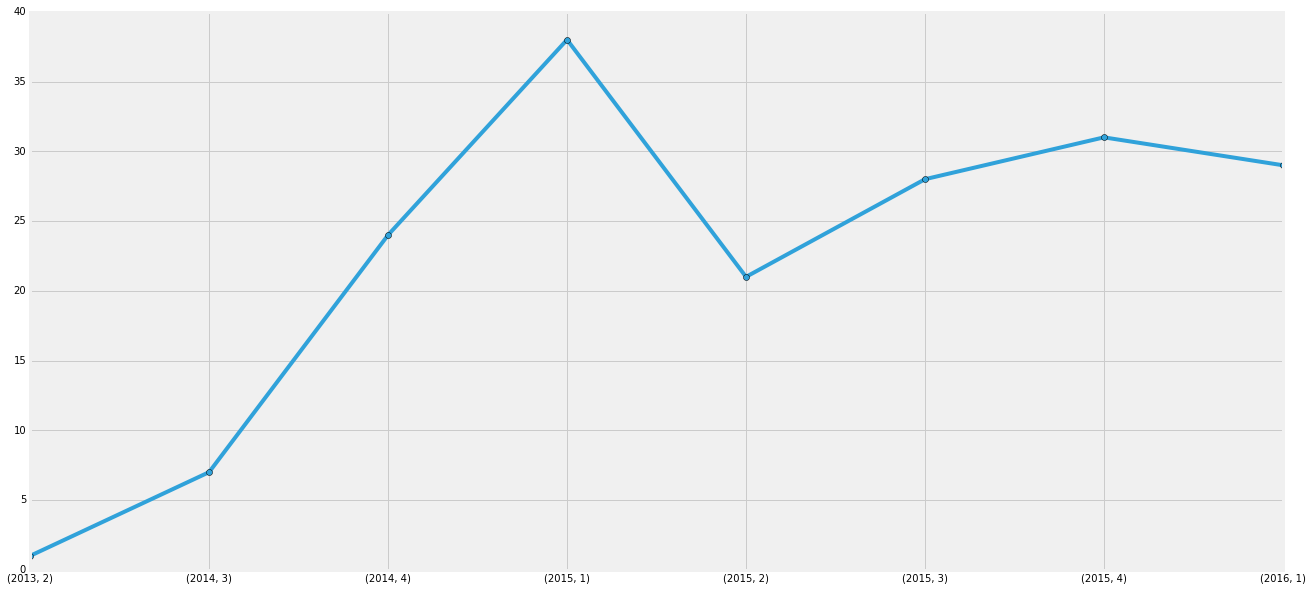

In [31]:
data.groupby([data.index.year, data.index.quarter]).count()['status_id'].plot(kind="line", figsize=(20,10), style="-o")

Na visão quadrimestral, é possível identificar uma tendência de crescimento no número de postagens entre o Q2/2013 até Q1/2015, que posteriormente, tem uma queda entre o Q1/2015 ao Q2/2015 e logo em seguida entre o Q3/2015 ao Q4/2015 vemos um pequeno crescimento no número de postagens.

Nesse gráfico, podemos perceber que o ritmo de publicações varia e uma possível dica seria de tentar manter um padrão de crescimento do número de postagens para obter melhores resultados.

### Frequência de postagem por mês

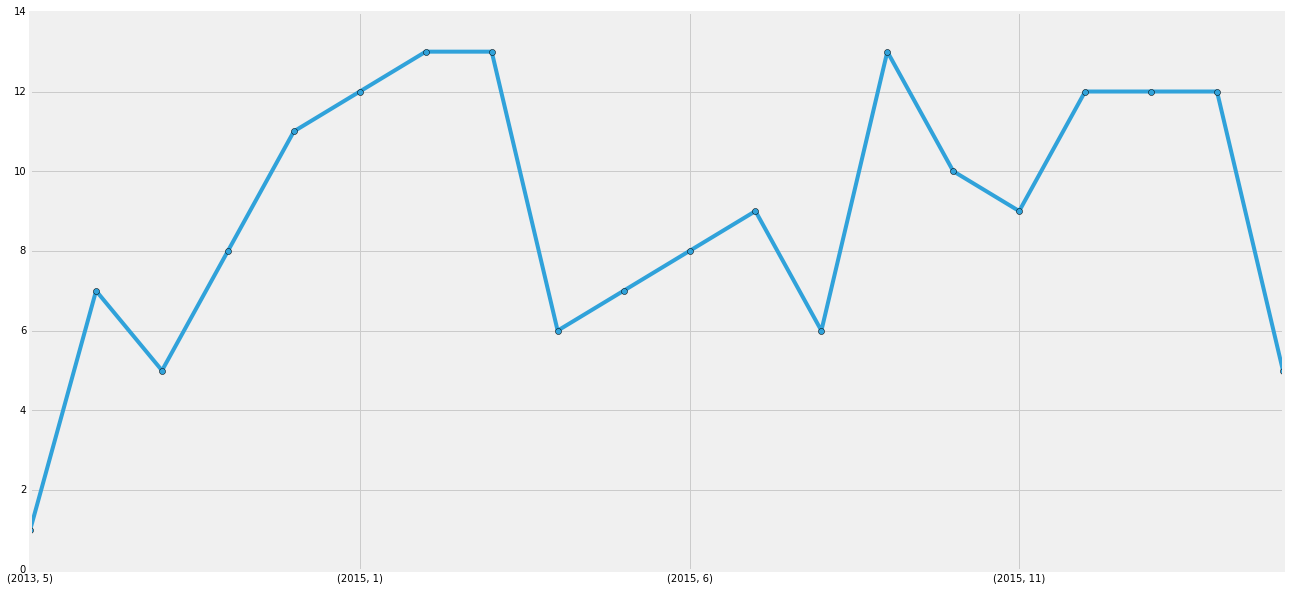

In [32]:
data.groupby([data.index.year, data.index.month]).count()['status_id'].plot(kind="line", figsize=(20,10), style="-o")

Na visão mensal, podemos verificar que o máximo de postagens realizadas no mês foi de 13 postagens realizadas no mês de Fevereiro e Março de 2015.

Além disso, de Maio/2013 até Março/2015 vemos uma tendência crescente na frequência de postagens por mês, que logo em seguida no mês de Abril/2015 tem uma queda de mais que a metade do mês anterior. Ainda, podemos ver que nos meses posteriores não há um padrão definido do número de postagens, indicando aquilo que já havíamos falado na visão quadrimestral, sugerindo que a página do Nubank Brasil deveria ter um ritmo mais padronizado da quantidade de postagens.

### Frequência de postagem por mês e interação mensal

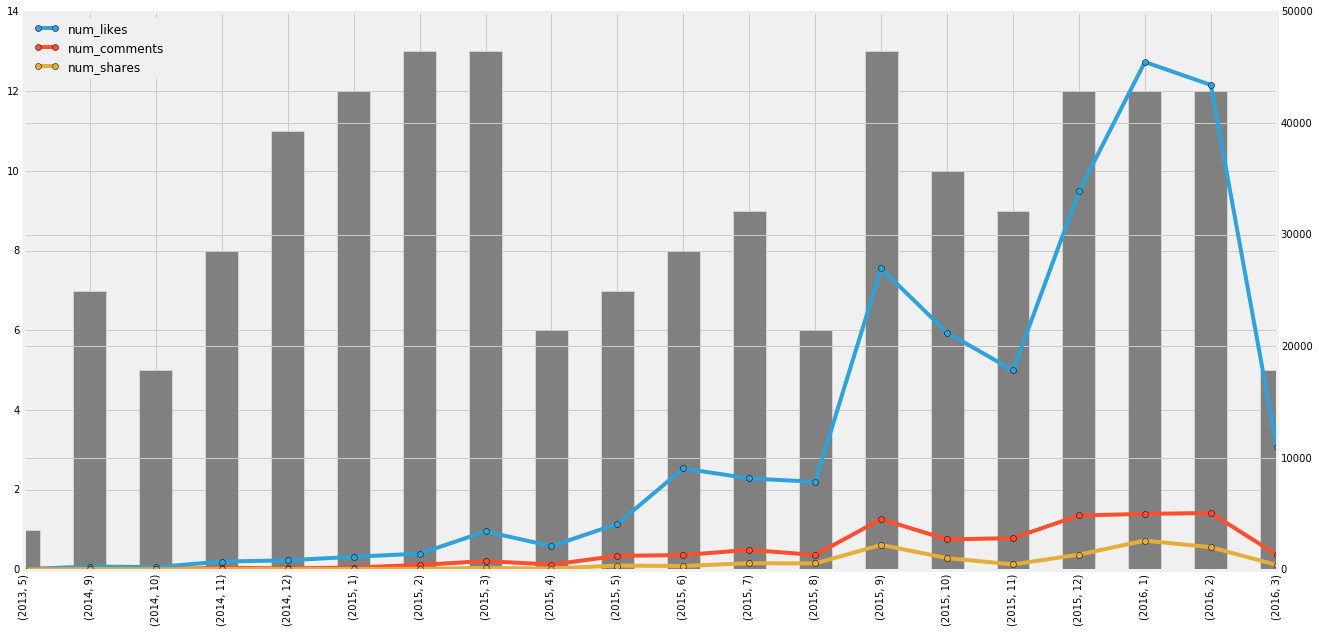

In [71]:
ax = data.groupby([data.index.year, data.index.month]).count()['status_id'].plot(kind="bar", figsize=(20,10), style="-o", color="gray")
ax2 = ax.twinx()
data[['num_likes', 'num_comments', 'num_shares']].groupby([data.index.year, data.index.month]).sum().plot(kind="line", figsize=(20,10), style="-o", ax=ax2)

Nesse gráfico podemos ver o impacto que a frequência de postagem possui sobre as interações e é possível notar que os meses em que houveram menos postagens, houveram menos interações.

### Frequência de postagem por semana

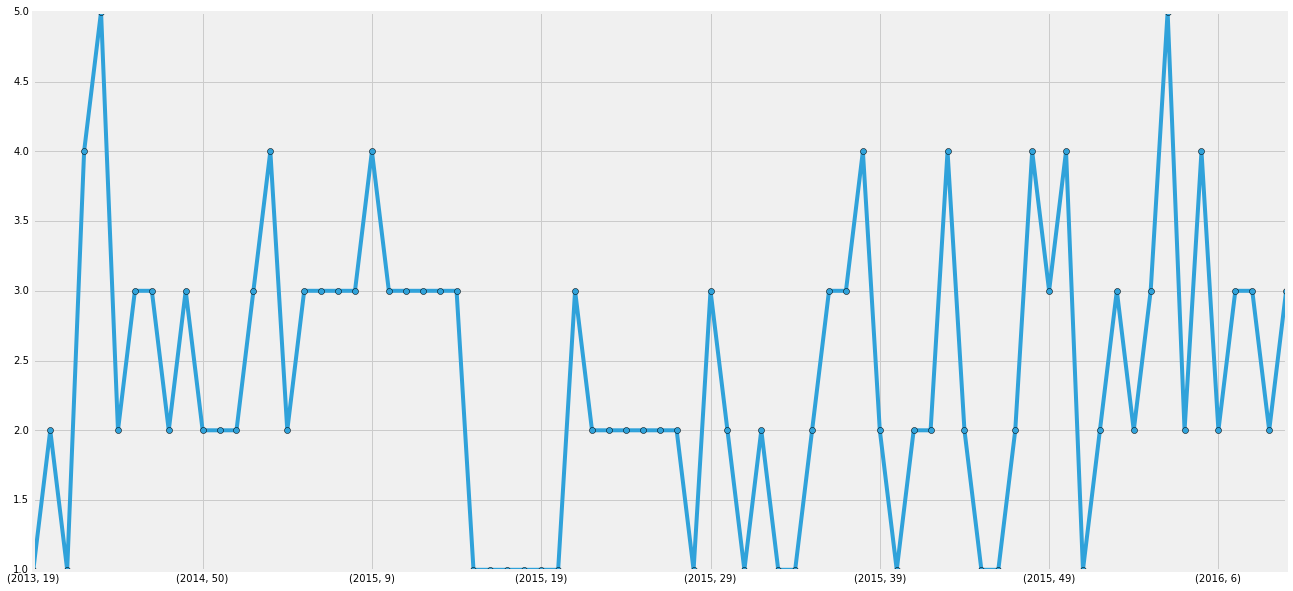

In [33]:
data.groupby([data.index.year, data.index.weekofyear]).count()['status_id'].plot(kind="line", figsize=(20,10), style="-o")

Na visão semanal, podemos identificar que algumas semanas houveram apenas 1 postagem na semana inteira.

Outro ponto, é que a quantidade de máxima de postagens em uma semana foi de 5 postagens, ou seja, menos que 1 postagem por dia.

Além disso, também é possível observar que não há um padrão definido da quantidade de postagens semanais, pois a quantidade varia muito de uma semana para a outra.

### Frequência de postagem por semana e interação semanal

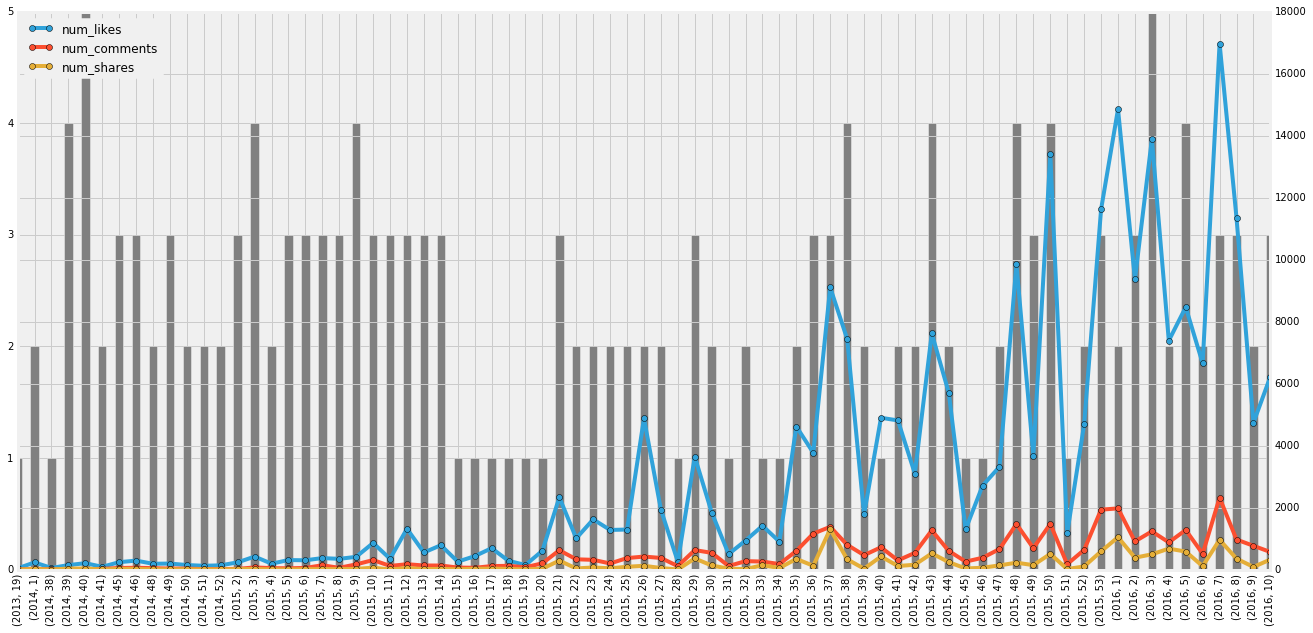

In [58]:
ax = data.groupby([data.index.year, data.index.weekofyear]).count()['status_id'].plot(kind="bar", figsize=(20,10), style="-o", color="gray")
ax2 = ax.twinx()
data[['num_likes', 'num_comments', 'num_shares']].groupby([data.index.year, data.index.weekofyear]).sum().plot(kind="line", figsize=(20,10), style="-o", ax=ax2)

In [63]:
freq_week_posts = data[['num_likes', 'num_comments', 'num_shares']].groupby([data.index.year, data.index.weekofyear]).sum().join(data.groupby([data.index.year, data.index.weekofyear]).count()['status_id'])

In [68]:
freq_week_posts.groupby(['status_id']).mean()

,num_likes,num_comments,num_shares
status_id,,,
1,977.437500,176.625000,54.250000
2,2980.769231,420.423077,139.653846
3,3658.739130,542.217391,220.608696
4,5968.250000,815.125000,279.125000
5,7044.500000,619.500000,262.500000


In [70]:
freq_week_posts.groupby(['status_id']).mean()/freq_week_posts.groupby(['status_id']).mean().shift(1)

,num_likes,num_comments,num_shares
status_id,,,
1,NaN,NaN,NaN
2,3.049575,2.380315,2.574264
3,1.227448,1.289695,1.579682
4,1.631231,1.503318,1.265249
5,1.180329,0.760006,0.940439


In [73]:
(freq_week_posts.groupby(['status_id']).mean()/freq_week_posts.groupby(['status_id']).mean().shift(1)).mean()

num_likes       1.772146
num_comments    1.483333
num_shares      1.589909
dtype: float64

## Conclusões

De acordo com as análises, podemos concluir que a postagem que visa maximizar o número de interações tem as seguintes características:

- Período da Publicação: Manhã
- Horários: 09:00, 12:00, 08:00
- Dias da semana: Terça-feira, Sábado, Domingo ou Quarta-feira
- Tipo de Publicação: Vídeo ou Foto
- Quantidade de Caracteres: Entre 295 e 393 caracteres

Além disso, através da análise da frequência de postagens verifica-se que a quantidade de postagens semanais varia muito e isso reflete diretamente no número de interações da página. 

Em média, a cada postagem adicional que é realizada durante a semana temos um aumento de:

- 77% no número de likes
- 48% no número de comentários
- 59% no número de compartilhamentos

Portanto, o autor sugere que a equipe responsável transforme os insights gerados nas análises em ações na página.

---

E para finalizar, agradeço ao feedback que o [Flávio Barros](https://br.linkedin.com/in/flaviommbarros/pt) me forneceu durante o desenvolvimento dessa análise.